In [1]:
import pandas as pd
df = pd.read_csv('super_monitor_pais.csv', names=["COMENTARIO", 'TARGET'], sep=';')
df.head()

,COMENTARIO,TARGET
0,Es la secretaria del colegio nuyrcionistas de ...,PERU
1,Juan Carlos Realiza pedido de 1d 1023 Anterior...,ARGENTINA
2,Pide 3u 1075 1d 1023 12 u 1051 6u 1059 3u 1...,ARGENTINA
3,Realiza pedido de 1 dispenser de 1023,ARGENTINA
4,REaliza pedido de 1d 1023,ARGENTINA


In [2]:
df.shape
#COMPLETO LAS CELDAS VACIAS CON LA PALABRA NO
df = df.fillna("no")

In [3]:
#CODIFICAR UNA COLUMNA CATEGORICA EN NÚMEROS
le = preprocessing.LabelEncoder()
le.fit(df['TARGET'])
#EN LE.CLASSES_ QUEDA ARMADO EL ARRAY DE INDEXACION
list(le.classes_)

NameError: name 'preprocessing' is not defined

In [ ]:
#Y CON ESTO HACEMOS LA TRANSFORMACIÓN EN EL DATASET

df['TARGET'] =le.transform(df['TARGET'])


In [ ]:
#CON ESTA FUNCION NOS DEVUELVE LAS CATEGORICAS, EN ESTE EJEMPLO LE PASO 3 INDEXES Y ME LOS DEVUELVE.
list(le.inverse_transform([2, 2, 1]))


In [ ]:
df.dtypes


In [144]:
#FORMAS DE CODIFICAR FEATURES CON NUMEROS:
#http://pbpython.com/categorical-encoding.html
#ESTÁN EXPLICADAAS LAS DUMMIES Y LAS BINARIES TAMBIEN



In [145]:
from sklearn.model_selection import train_test_split


In [165]:
#HAGO EL SPLIT DEL PADA. USO LOS NOMBRES DE LAS COLUMNAS
X_train, X_test, y_train, y_test = train_test_split(df['COMENTARIO'], df['TARGET'], test_size=0.30, random_state=1)

In [166]:
X_test.shape


(10493,)

In [167]:
X_test

18642    medico mostro gran interes por nortricol y ros...
1288      Apoyando marcas foco le gusta mucho Ho calmatol 
6693     Dijo que si receto folifer verificar en proxim...
33602                                   Vatanal muy usado 
21932    Ojo el stimol es 11500 cu Todo con etiquetas n...
25245    Recordatorio de antibioticos y perenterll caps...
12497    Faltantes acomode linea deje comision muestras...
31047                           Se Hablo del cierre de mes
5411     Consultar con vendedor Alberto Bonificacion en...
18563                                 Medico en evaluacion
7819     Dr se compromete con vermoil aumento de parasi...
30710    SE VISITA EN ESTA OPORTUNIDAD POR REUNION DE L...
24376    QF Nayda Perez y Carlos Cayumil2 asistentes10 ...
11021                         Entrega de material a la DC 
29535        Se presento portafolio y se reviso inventario
27997       Se envia lista de precios Clinica y Hospitales
26944    Se cobro la ultima factura y se levanto un pedi

In [168]:
#EXTRACTO LAS PALABAS Y LAS CUENTO
from sklearn.feature_extraction.text import CountVectorizer
modelo_cvec = CountVectorizer()###stop_words='english'

In [169]:
#CONVIERTO EL X TRAIN EN ARRAY DE PALABRAS CONTADAS
X_train = modelo_cvec.fit_transform(X_train)



In [170]:
X_train.shape

(24481, 18879)

In [171]:
X_train

<24481x18879 sparse matrix of type '<class 'numpy.int64'>'
	with 264840 stored elements in Compressed Sparse Row format>

In [172]:
from sklearn.naive_bayes import MultinomialNB
modelo_NB = MultinomialNB()
modelo_NB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [173]:
X_test = modelo_cvec.transform(X_test) #ESTO QUEE HACE??????
labels_predichas = modelo_NB.predict(X_test)

In [174]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, labels_predichas)

0.88887829981892685

In [175]:
##VOY A PROBAR CON EL TEST LA ACCURACY DE PREDICCION QUE TIENE EL MODELO
##LO QUE HAGO ES PASAR AL MODELO LOS PREDICTORES QUE GUARDÉ PARA TESTEAR (30% EN ESTE CASO)
##EN LA LISTA Y_PRED, ELMODELO ME DEVUELVE LAS PREDICCIONES O LOS TARGET UE CALCULÓ, ESO ES Y_PRED
y_pred =modelo_NB.predict(X_test)
y_pred

array([2, 1, 1, ..., 1, 6, 0], dtype=int64)

In [178]:
XXX.shape

(1,)

In [198]:
#import numpy as np
X_predict=np.array([['hola como te va']])
#X_predict = (input().split(","))
prediccion = modelo_NB.predict([["hola como te va"]])
prediccion

TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'

In [83]:
import pickle
list_pickle_path = 'modelo2.pkl'
 
# Create an variable to pickle and open it in write mode
list_pickle = open(list_pickle_path, 'wb')
pickle.dump(model, list_pickle)
list_pickle.close()

NameError: name 'model' is not defined

In [84]:
##EL METODO ACCURACY SCORE BASICAMENTE ME COMPARA LOS TARGET QUE GUARDÉ DE TESTEO (30%) Y LOS COMPARA CON LOS QUE PREDIJO Y_PRED
##ESTO DEVUELVE EL % DE ACIERTOS QUE TUVO
from sklearn.metrics import accuracy_score
accuracy_score(y_test,labels_predichas)

0.88887829981892685

In [85]:
##ESTO NO SE QUE HACE, PERO EVIDENTEMENTE ESTÁ TIRANDO INDICADORES DE CALIDAD. PREGUNTAR QUÉ ES CADA UNO?
##DA VALORES PARA CADA TIPO DE TARGET???
from sklearn.metrics import classification_report
print(classification_report(y_test,labels_predichas))

             precision    recall  f1-score   support

          0       0.88      0.90      0.89      2165
          1       0.89      0.94      0.92      1796
          2       0.86      0.94      0.90      2500
          3       0.89      0.91      0.90      2134
          4       0.99      0.53      0.69       348
          5       0.00      0.00      0.00        27
          6       0.92      0.84      0.88      1442
          7       1.00      0.04      0.07        81

avg / total       0.89      0.89      0.88     10493



C:\Users\Drakon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [183]:
##ESTO ME AHCE LA MATRIZ DE CONFUSION. COMO PUEDO PONERLE LOS HEADERS?
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,labels_predichas))


[[1953   25   94   71    0    0   22    0]
 [  27 1689   53    9    2    0   16    0]
 [  55   43 2338   49    0    0   15    0]
 [  66   44   61 1952    0    0   11    0]
 [  18   18   46   48  183    0   35    0]
 [   2    8   14    3    0    0    0    0]
 [  51   44   85   53    0    0 1209    0]
 [  40   17   14    6    0    0    1    3]]


In [184]:
##PREGUNTAR: ES EL EJE X LO PREDECIDO, O SEA LO SEGUNDO QUE LE PASO A LA MATRIZ O ES AL REVES????
laMatriz = confusion_matrix(y_test,labels_predichas)

In [194]:
##GRAFICO LA MATRIZ DE CONFUSION CON MAS CALIDAD
##IMPORTO LAS LIBRERIAS QUE VOY A USAR:
#import seaborn as sn
#import pandas as pd
#import matplotlib.pyplot as plt
##ARMO EL OBJETO, PRIMERO LE PASO EL ARRAY, SEGUNDO LOS PASO EL INDEX DE FILAS Y TERCERO LAS COLUMNAS
#df_cm = pd.DataFrame(laMatriz, index = ["AR", "CH", "CO", "GU", "ME", "PA", "PE", "UR"],columns = ["AR", "CH", "CO", "GU", "ME", "PA", "PE", "UR"])
#plt.figure(figsize = (10,7))
#sn.heatmap(df_cm, annot=True)
## ESTO RECORRE EL STRING Y PONE DE A UN CHARCTER X FILA O COL: index = [i for i in "ABCD"]
##PUEDO PASARLE UNA LISTA PARECE, ASÍ: index = ["OPCION A","OPCION B"]

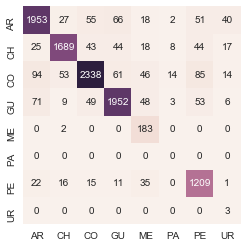

In [195]:
#ESTA SI ANDA--------------------------------------------------
from sklearn.metrics import confusion_matrix
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
mat = confusion_matrix(y_test, labels_predichas)
mat.shape
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["AR", "CH", "CO", "GU", "ME", "PA", "PE", "UR"], 
            yticklabels=["AR", "CH", "CO", "GU", "ME", "PA", "PE", "UR"])

In [192]:
##ERROR CUADRÁTICO???? CÓMO SE INTEPRETA?
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,labels_predichas)

1.2177642237682265

In [193]:
##Y ESTO????? R CUADRADO?????
from sklearn.metrics import r2_score
r2_score(y_test,labels_predichas)

0.66800156497372376